# Electronics Store Sales Data Analysis
### Objectives:
- Conduct an exploratory data analysis (EDA) on sales data.
- Analyze monthly sales performance and identify trends.
- Find optimal advertisement timings.
- Suggest cross-selling strategies through product bundling analysis.

In [13]:
import kagglehub
import pandas as pd
import os

dataset_path = kagglehub.dataset_download("dhruvkothari19/practice-eda-on-this-sales-dataset")
files = os.listdir(dataset_path)

csv_files = [f for f in files if f.endswith('.csv')]

df_list = [pd.read_csv(os.path.join(dataset_path, file)) for file in csv_files]
df = pd.concat(df_list, ignore_index=True)

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Data Cleaning:
- Removing rows with missing values in all columns.
- Filtering out invalid records where the order date is not available.
- Converting columns to the appropriate data types, such as Quantity Ordered, Price Each, and Order Date.

In [14]:
df.dropna(how='all', inplace=True)

df = df[df['Order Date'].str[0:2] != 'Or']

df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')

df['Month'] = df['Order Date'].dt.month
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df['City'] = df['Purchase Address'].apply(lambda x: f"{x.split(',')[1]} ({x.split(',')[2].split(' ')[1]})")

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


### Monthly Sales Performance
- The monthly sales performance is visualized using a bar chart to identify trends and fluctuations in sales across different months.

/var/folders/11/h02hps1j64q2bny64_2h6lq80000gn/T/ipykernel_54671/1386455221.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="viridis")


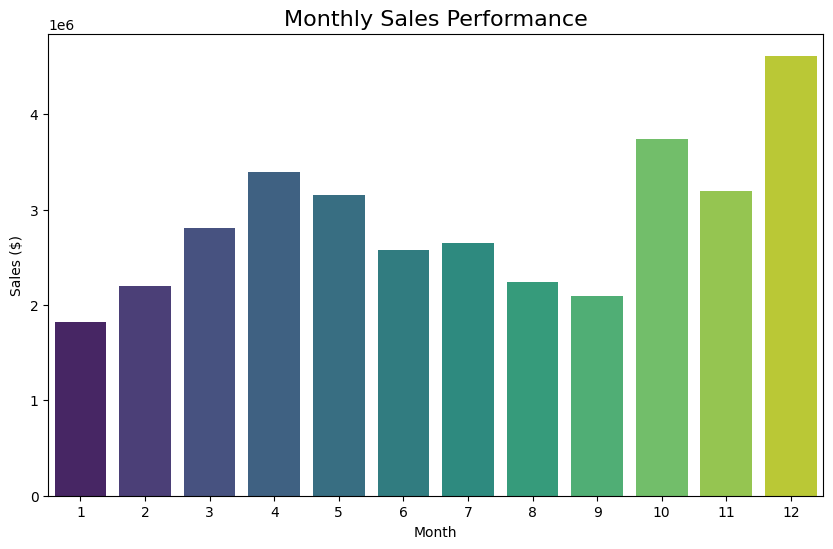

The highest-earning month is Month 12.


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="viridis")
plt.title('Monthly Sales Performance', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.show()

highest_month = monthly_sales.idxmax()
print(f"The highest-earning month is Month {highest_month}.")


### Sales by City
- Provides a breakdown of the total sales by city, helping to identify high-performing cities.

/var/folders/11/h02hps1j64q2bny64_2h6lq80000gn/T/ipykernel_54671/1313954904.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.index, y=city_sales.values, palette="Blues_d")


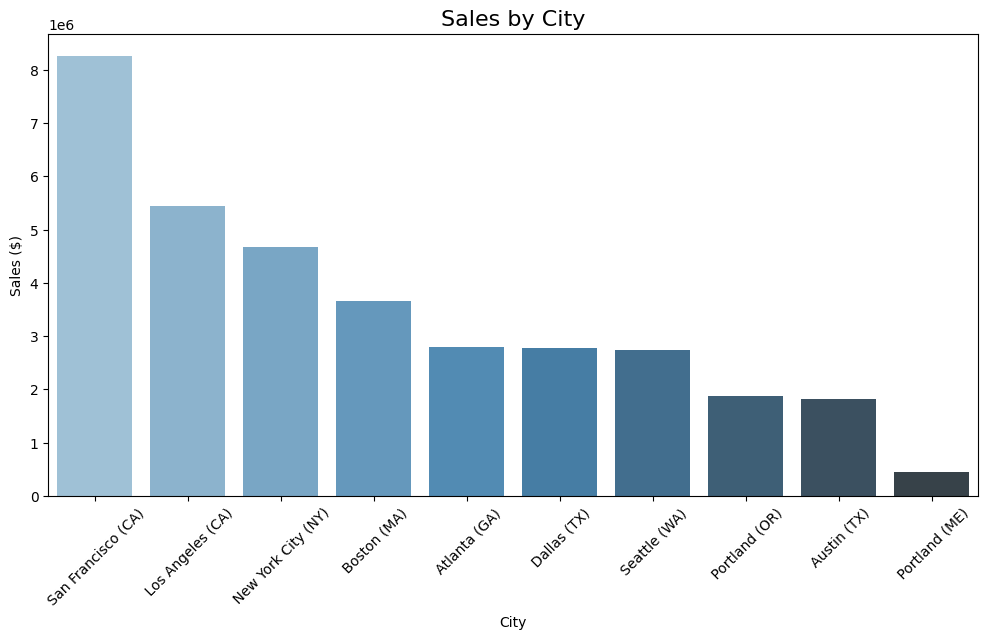

In [23]:
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=city_sales.index, y=city_sales.values, palette="Blues_d")
plt.title('Sales by City', fontsize=16)
plt.xlabel('City')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.show()

### Top Selling Products
- Top-selling products based on quantity ordered.

/var/folders/11/h02hps1j64q2bny64_2h6lq80000gn/T/ipykernel_54671/3264055194.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="coolwarm")


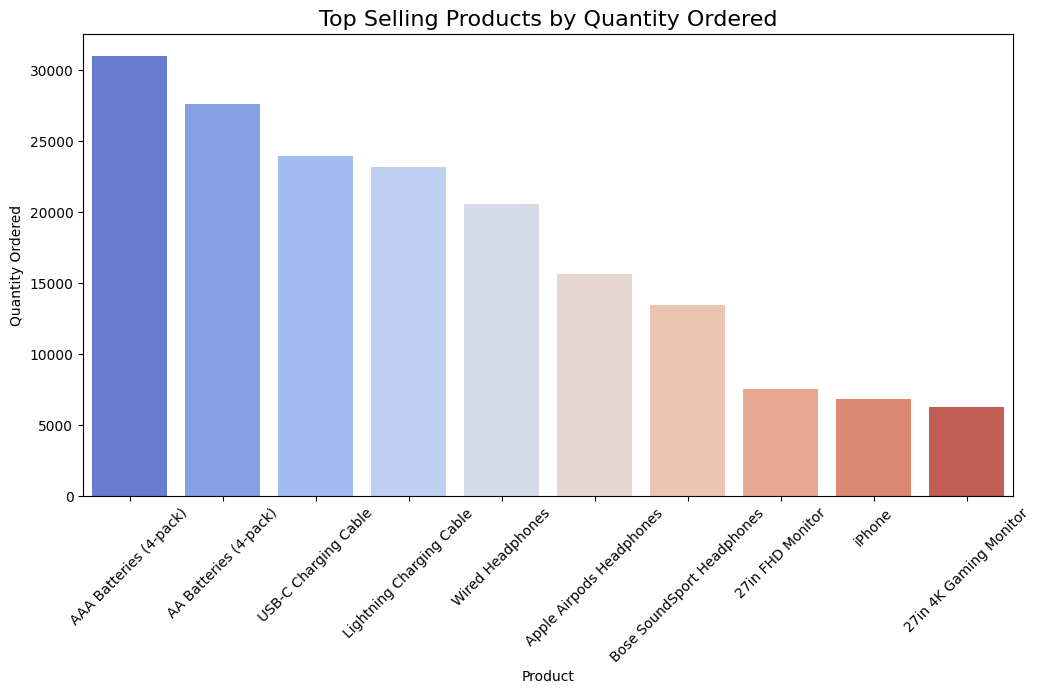

In [24]:
top_products = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette="coolwarm")
plt.title('Top Selling Products by Quantity Ordered', fontsize=16)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.show()

### Sales Distribution by Product Category
- pie chart showing the proportion of sales coming from electronics vs accessories, guiding category-specific marketing strategies.

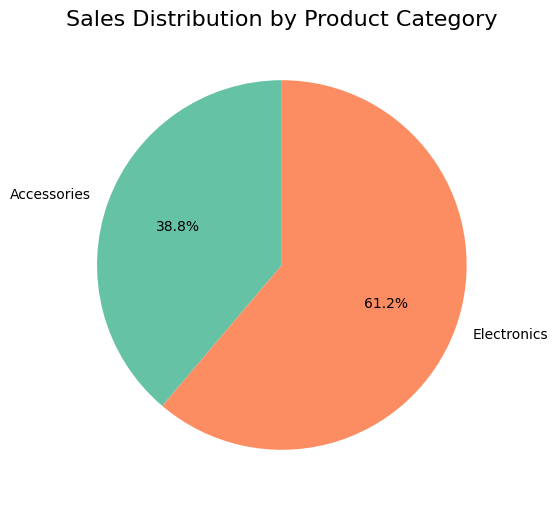

In [26]:
product_category = df.copy()
product_category['Category'] = product_category['Product'].apply(lambda x: 'Electronics' if 'Phone' in x or 'Laptop' in x else 'Accessories')

category_sales = product_category.groupby('Category')['Sales'].sum()

# Plotting sales distribution by category
plt.figure(figsize=(8, 6))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"), startangle=90)
plt.title('Sales Distribution by Product Category', fontsize=16)
plt.show()

### Sales Trend Over Time
- This line plot gives a clear view of sales fluctuations over time, showing daily peaks or valleys.

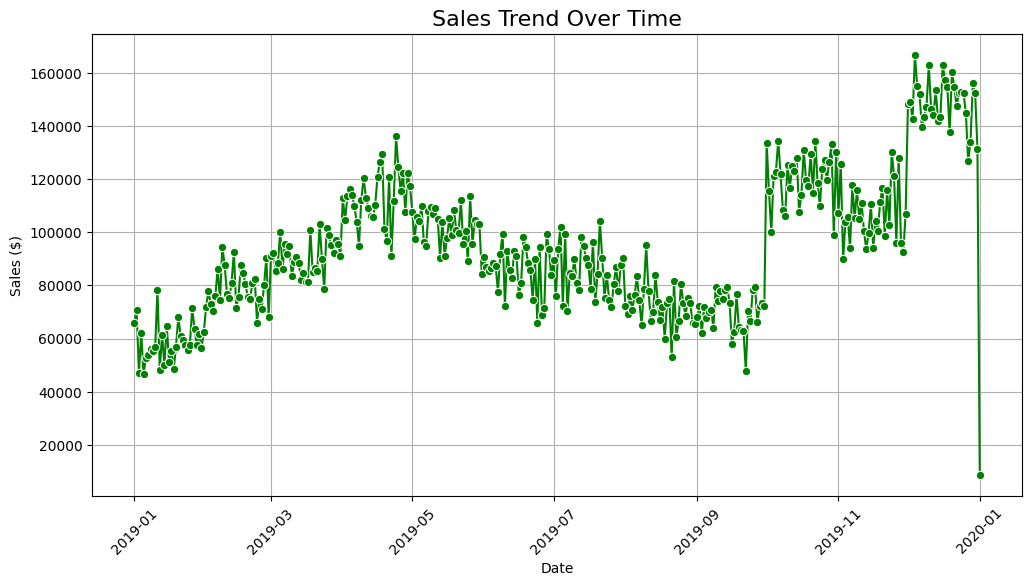

In [27]:
daily_sales = df.groupby(df['Order Date'].dt.date)['Sales'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_sales.index, y=daily_sales.values, color='green', marker='o')
plt.title('Sales Trend Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Peak Purchasing Times
- Analyzing the hourly sales performance helps determine the best times for advertisements or promotions.

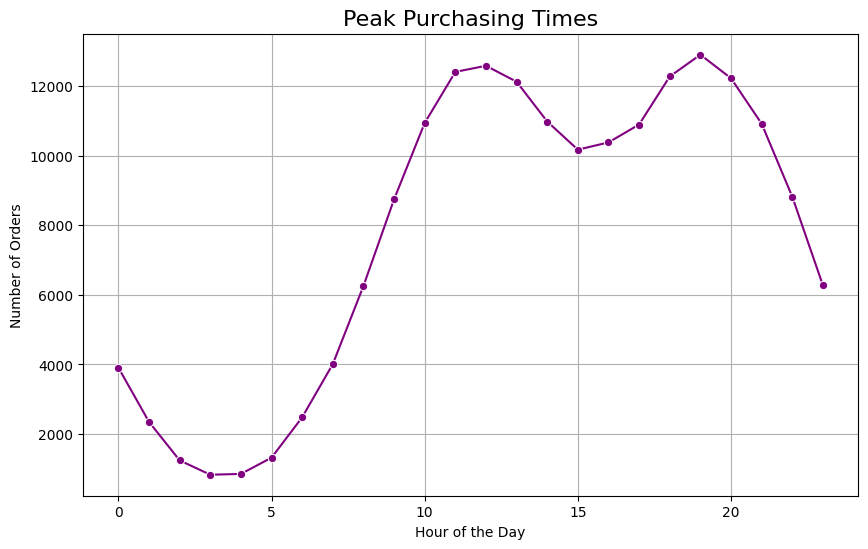

Peak purchasing times are around these hours: [19, 12, 11].


In [18]:
hourly_sales = df.groupby(df['Order Date'].dt.hour).count()['Order ID']

plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker='o', color='purple')
plt.title('Peak Purchasing Times', fontsize=16)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

peak_hours = hourly_sales.nlargest(3).index.tolist()
print(f"Peak purchasing times are around these hours: {peak_hours}.")


### Product Bundling Analysis
- By performing a market basket analysis through product combinations, we can uncover popular product bundles for cross-selling.

/var/folders/11/h02hps1j64q2bny64_2h6lq80000gn/T/ipykernel_54671/3968145000.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pairs, y=counts, palette="viridis")


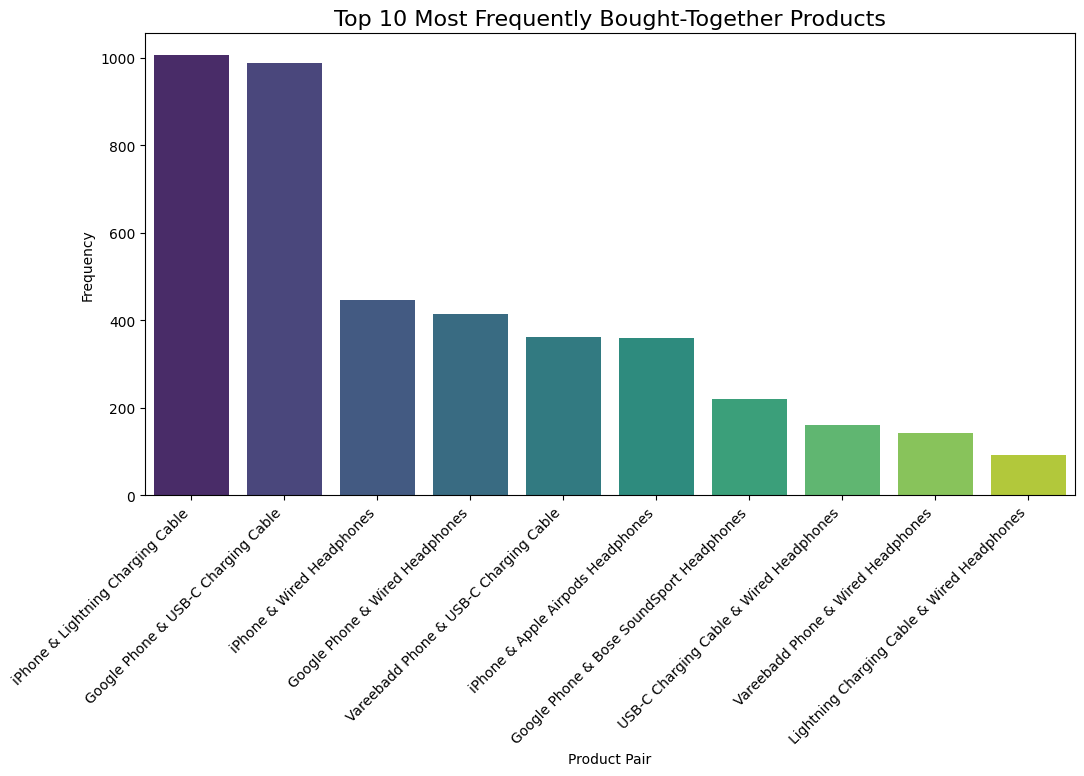

In [30]:
from itertools import combinations
from collections import Counter

product_data = df[['Order ID', 'Product']].copy()

product_data['Grouped'] = product_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

product_data = product_data.drop_duplicates(subset=['Order ID', 'Grouped'])

counter = Counter()

for group in product_data['Grouped']:
    items = group.split(',')
    counter.update(combinations(items, 2))

most_common_combinations = counter.most_common(10)

pairs = [f"{combo[0]} & {combo[1]}" for combo, _ in most_common_combinations]
counts = [count for _, count in most_common_combinations]

plt.figure(figsize=(12, 6))
sns.barplot(x=pairs, y=counts, palette="viridis")
plt.title('Top 10 Most Frequently Bought-Together Products', fontsize=16)
plt.xlabel('Product Pair')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()